[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 6.729864483587902


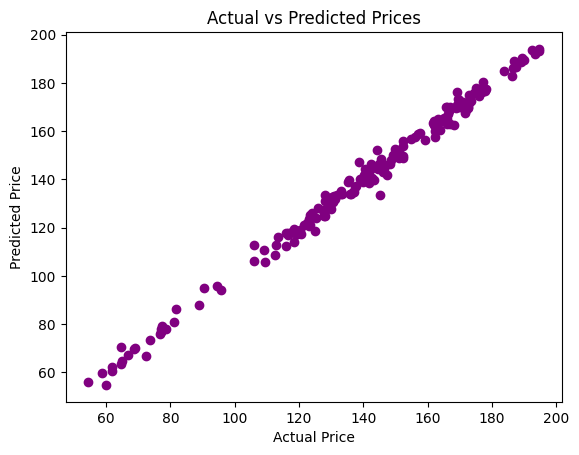

In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#import data
data = yf.download('AAPL',start = '2020-01-01' ,end = '2024-01-01')
data.rename(columns={'Close':'Price'},inplace = True)
data.head()

#predict tomorrows price by a lag feature
data['Target'] = data['Price'].shift(-1)
data.dropna(inplace = True)

# Keep only 'Price' and 'Target' columns
data = data[['Price', 'Target']] # Select 'Price' and 'Target'
data.head()

#define the features and label
X = data[['Price']]
y = data['Target']

#split test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the model
model = LinearRegression()
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)

#evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

#plot actual vs predicted
plt.scatter(y_test, y_pred, color = 'purple')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()



## 📊 Conclusion

This project uses a simple Linear Regression model to predict the next day's stock price based on the current day's price. While the model captures basic trends, the scatter plot of actual vs. predicted prices shows that real-world stock movements are noisy and not fully captured by linear assumptions.

🔹 This model is a useful starting point for understanding supervised learning workflows.  
🔹 Future improvements could include additional features (volume, moving averages) or more complex models like Random Forest or LSTM for better prediction accuracy.
